In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Загрузка данных
zp_data = pd.read_excel("zp.xlsx")
inf_year_data = pd.read_excel("inf_year.xlsx")
inf_month_data = pd.read_excel("inf_month.xlsx")

# Преобразование данных зарплат в long format
zp_long = zp_data.melt(id_vars=["Категория"], var_name="Год", value_name="Номинальная_ЗП")
zp_long["Год"] = zp_long["Год"].astype(int)

# Использование годового коэффициента инфляции
inf_year_simple = inf_year_data[["Год", "Всего"]].rename(columns={"Всего": "Годовой_коэф_инфляции"})
inf_year_simple["Год"] = inf_year_simple["Год"].astype(int)

# Объединение данных о зарплате с данными об инфляции
zp_inflation = pd.merge(zp_long, inf_year_simple, on="Год")
zp_inflation["Реальная_ЗП"] = zp_inflation["Номинальная_ЗП"] / (1 + zp_inflation["Годовой_коэф_инфляции"] / 100)

# Фильтрация данных, исключая категорию "Всего"
zp_filtered = zp_inflation[zp_inflation["Категория"] != "Всего"]


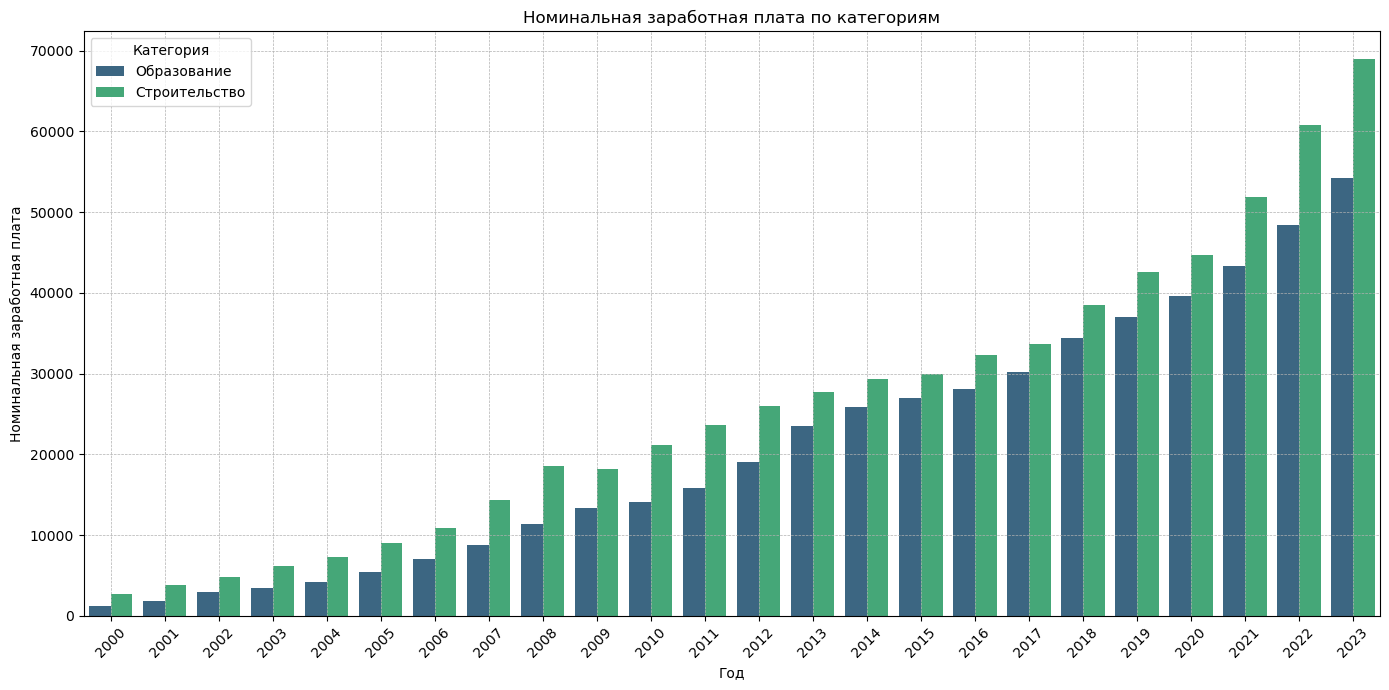

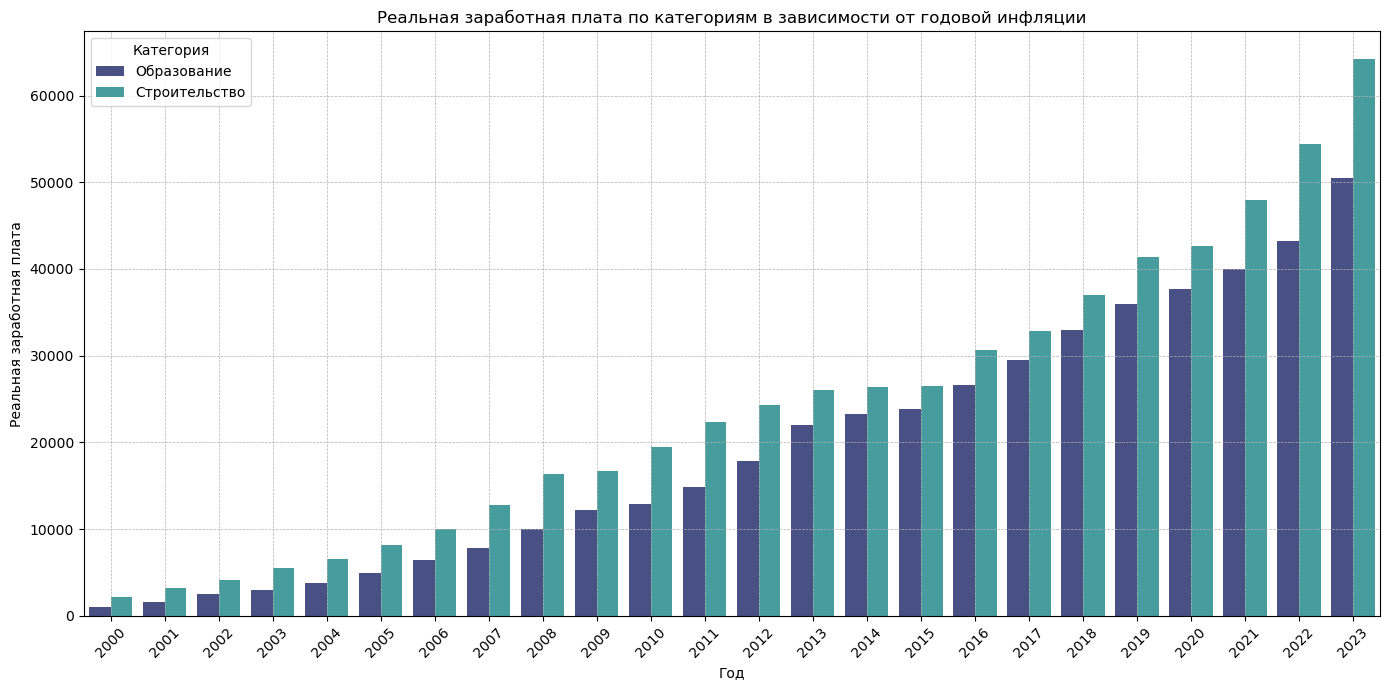

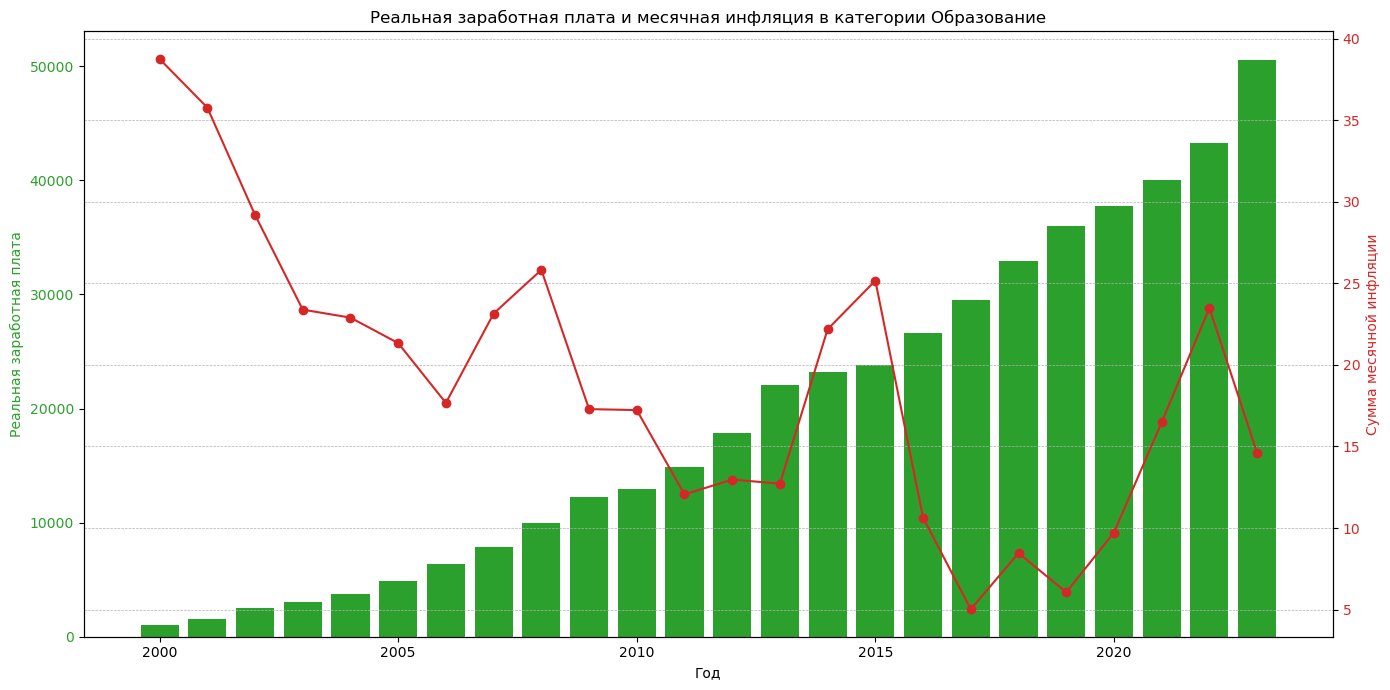

Выводы по графикам:

График номинальной заработной платы по категориям: Номинальные зарплаты в области образования и строительства показывают устойчивый рост с 2000 по 2023 год. Однако зарплата в образовании растёт медленнее, чем в строительстве, особенно начиная с 2010 года.

График реальной заработной платы по категориям в зависимости от годовой инфляции: Когда зарплаты корректируются с учётом инфляции, видно, что рост реальных зарплат значительно медленнее, чем номинальных. Это указывает на то, что инфляция существенно влияет на покупательную способность заработной платы в обеих категориях.

График реальной заработной платы и месячной инфляции в категории Образование: На этом графике мы видим, что в течение некоторых периодов наблюдался сильный рост инфляции, что, вероятно, повлияло на снижение реальной зарплаты. Несмотря на это, реальная зарплата в области образования в целом демонстрирует рост, особенно заметный после 2016 года.

График реальной заработной платы и месячной инфляци

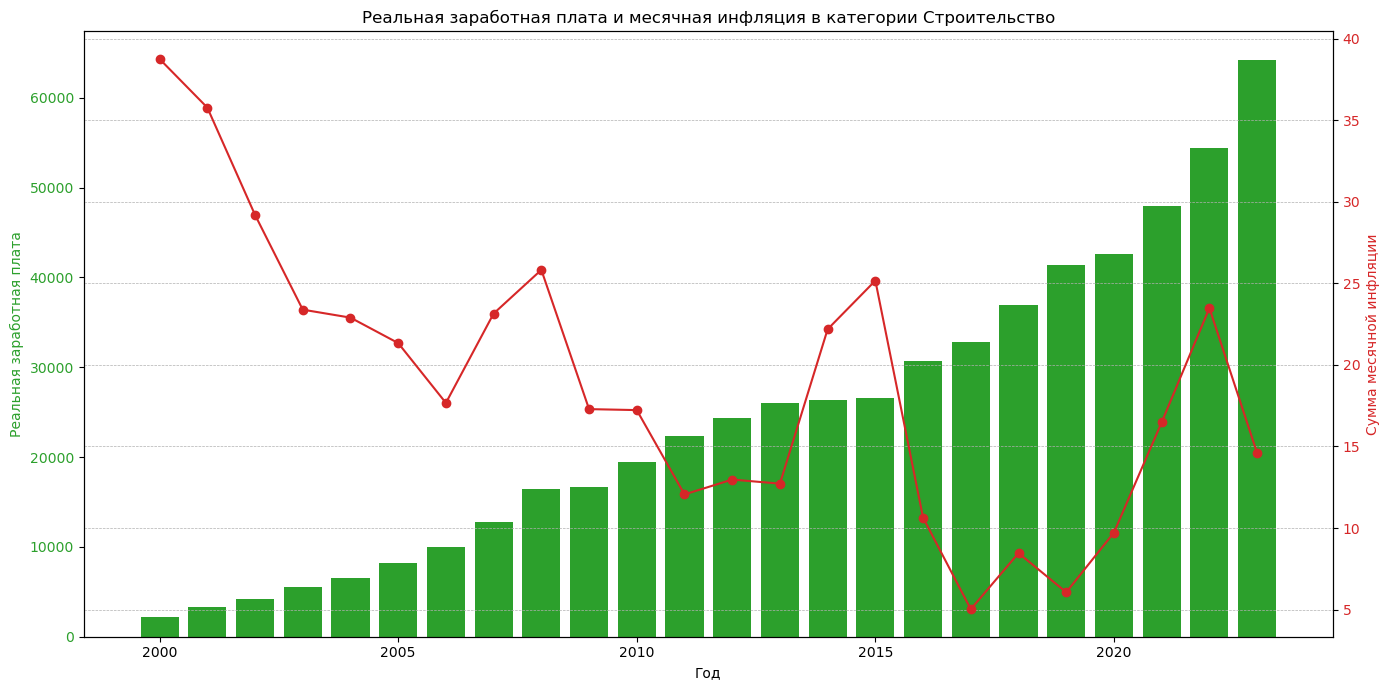

Выводы по графикам:

График номинальной заработной платы по категориям: Номинальные зарплаты в области образования и строительства показывают устойчивый рост с 2000 по 2023 год. Однако зарплата в образовании растёт медленнее, чем в строительстве, особенно начиная с 2010 года.

График реальной заработной платы по категориям в зависимости от годовой инфляции: Когда зарплаты корректируются с учётом инфляции, видно, что рост реальных зарплат значительно медленнее, чем номинальных. Это указывает на то, что инфляция существенно влияет на покупательную способность заработной платы в обеих категориях.

График реальной заработной платы и месячной инфляции в категории Образование: На этом графике мы видим, что в течение некоторых периодов наблюдался сильный рост инфляции, что, вероятно, повлияло на снижение реальной зарплаты. Несмотря на это, реальная зарплата в области образования в целом демонстрирует рост, особенно заметный после 2016 года.

График реальной заработной платы и месячной инфляци

In [11]:
# График номинальной заработной платы
plt.figure(figsize=(14, 7))
sns.barplot(data=zp_filtered, x="Год", y="Номинальная_ЗП", hue="Категория", palette="viridis")
plt.title('Номинальная заработная плата по категориям')
plt.xlabel('Год')
plt.ylabel('Номинальная заработная плата')
plt.legend(title='Категория', loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Визуализация реальной заработной платы с учетом годовой инфляции
plt.figure(figsize=(14, 7))
sns.barplot(data=zp_filtered, x="Год", y="Реальная_ЗП", hue="Категория", palette="mako")
plt.title('Реальная заработная плата по категориям в зависимости от годовой инфляции')
plt.xlabel('Год')
plt.ylabel('Реальная заработная плата')
plt.legend(title='Категория', loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Подготовка данных о месячной инфляции
inf_month_summary = inf_month_data.melt(id_vars=["Год"], var_name="Месяц", value_name="Месячная_инфляция")
inf_month_summary = inf_month_summary.groupby("Год").agg({'Месячная_инфляция': 'sum'}).reset_index()

# Создание графиков для Образования и Строительства
categories = ["Образование", "Строительство"]
for category in categories:
    category_data = zp_filtered[zp_filtered["Категория"] == category]
    category_inflation = pd.merge(category_data, inf_month_summary, on="Год")

    # Второй график с двумя осями
    fig, ax1 = plt.subplots(figsize=(14, 7))
    color = 'tab:green'
    ax1.set_xlabel('Год')
    ax1.set_ylabel('Реальная заработная плата', color=color)
    ax1.bar(category_inflation["Год"], category_inflation["Реальная_ЗП"], color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_title(f'Реальная заработная плата и месячная инфляция в категории {category}')

    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Сумма месячной инфляции', color=color)
    ax2.plot(category_inflation["Год"], category_inflation["Месячная_инфляция"], color=color, marker='o')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()
    
    print("Выводы по графикам:\n")
    print("График номинальной заработной платы по категориям: Номинальные зарплаты в области образования и строительства показывают устойчивый рост с 2000 по 2023 год. Однако зарплата в образовании растёт медленнее, чем в строительстве, особенно начиная с 2010 года.\n")
    print("График реальной заработной платы по категориям в зависимости от годовой инфляции: Когда зарплаты корректируются с учётом инфляции, видно, что рост реальных зарплат значительно медленнее, чем номинальных. Это указывает на то, что инфляция существенно влияет на покупательную способность заработной платы в обеих категориях.\n")
    print("График реальной заработной платы и месячной инфляции в категории Образование: На этом графике мы видим, что в течение некоторых периодов наблюдался сильный рост инфляции, что, вероятно, повлияло на снижение реальной зарплаты. Несмотря на это, реальная зарплата в области образования в целом демонстрирует рост, особенно заметный после 2016 года.\n")
    print("График реальной заработной платы и месячной инфляции в категории Строительство: В этом секторе зарплаты также показывают увеличение, но, как и в случае с образованием, существуют периоды, когда рост инфляции оказывал негативное влияние на реальные доходы работников. Особенно ярко выраженный рост реальной зарплаты начинается с 2010 года и продолжается вплоть до 2023 года.\n")
    print("Общие выводы: В обеих отраслях, несмотря на флуктуации инфляции, реальные зарплаты со временем растут, что указывает на общее улучшение уровня жизни работников в данных категориях. Однако следует отметить, что рост зарплат не всегда соответствует росту инфляции, что может приводить к снижению покупательной способности в определённые годы.")